# Investigating low HRDetect scores in BRCA mutation categories

In [1]:
rm(list=ls())
#setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/")
setwd("~/Desktop/BRCA1_BRCA2_SVs_paper/")
sampleInfo<-read.table("Manuscript/Intermediate_data/SampleInformation_full.txt",sep="\t",header=T,stringsAsFactors=F)
rownames(sampleInfo)<-sampleInfo[,1]

sampleInfo[sampleInfo$BRCAstatus=="None" & sampleInfo$BRCA1_pro_meth==1,"BRCAstatus"]<-"BRCA1 promoter methylation"
sampleInfo[sampleInfo$BRCAstatus=="BRCA1 promoter methylation","BRCAstatus_compound"]<-"BRCA1 promoter methylation"

In [2]:
dat<-sampleInfo[sampleInfo$BRCA1_pro_meth!=1,]


In [3]:
#Make mutexclcategory
hrd_snv_only<-dat[(dat$BRCAstatus=="Germline SNV"|dat$BRCAstatus=="Somatic SNV") & dat$BRCAstatus_SV=='SV absent'  ,
   c("Sample","HRDetect")]
df_1<-data.frame(MutCat="SNV_only",hrd_snv_only,Col="SNV")


hrd_germSNV<-dat[(dat$BRCAstatus=="Germline SNV") & dat$BRCAstatus_SV=='SV absent'  ,
   c("Sample","HRDetect")]
df_2<-data.frame(MutCat="Germline SNV only",hrd_germSNV,Col="SNV")

hrd_somSNV<-dat[(dat$BRCAstatus=="Somatic SNV") & dat$BRCAstatus_SV=='SV absent'  ,
   c("Sample","HRDetect")]
df_3<-data.frame(MutCat="Somatic SNV only",hrd_somSNV,Col="SNV")

hrd_anydel<-dat[dat$BRCAstatus=="Deletion overlapping exon (LOF)"  ,
    c("Sample","HRDetect")]
df_4<-data.frame(MutCat="Any deletion only",hrd_anydel,Col="Deletion")

hrd_singledel<-dat[(dat$BRCAstatus_SV=="Single deletion" & dat$BRCAstatus=="Deletion overlapping exon (LOF)"),
                   c("Sample","HRDetect")]
df_5<-data.frame(MutCat="Single deletion",hrd_singledel,Col="Deletion")

hrd_doubledel<-dat[(dat$BRCAstatus_SV=="Double deletion" & dat$BRCAstatus=="Deletion overlapping exon (LOF)"),
                   c("Sample","HRDetect")]
df_6<-data.frame(MutCat="Double deletion",hrd_doubledel,Col="Deletion")

hrd_sameorboth<-dat[((dat$BRCAstatus_compound=="SNV + deletion (same gene)")|
                     (dat$BRCAstatus_compound=="SNV + deletions (both genes)"))
  , c("Sample","HRDetect")]
df_7<-data.frame(MutCat="Compound same or both",hrd_sameorboth,Col="SNV + deletion")

hrd_same<-dat[((dat$BRCAstatus_compound=="SNV + deletion (same gene)"))
  , c("Sample","HRDetect")]
df_8<-data.frame(MutCat="Compound same",hrd_same,Col="SNV + deletion")

hrd_both<-dat[((dat$BRCAstatus_compound=="SNV + deletions (both genes)"))
  , c("Sample","HRDetect")]
df_9<-data.frame(MutCat="Compound both",hrd_both,Col="SNV + deletion")

hrd_nondel<-dat[(dat$BRCAstatus!="Germline SNV" & dat$BRCAstatus!="Somatic SNV" &
     dat$BRCAstatus!="None"& dat$BRCAstatus!="BRCA1 promoter methylation" & dat$BRCAstatus!="Deletion overlapping exon (LOF)" &
     dat$BRCAstatus!="Complex combination of SV intervals including 1+ LOF (CPX: LOF)" ) ,
    c("Sample","HRDetect")]
df_10<-data.frame(MutCat="SV non_del",hrd_nondel,Col="Non-deletion SV")

hrd_methyl<-sampleInfo[sampleInfo$BRCAstatus == "BRCA1 promoter methylation",c("Sample","HRDetect")]
df_11<-data.frame(MutCat="Promoter methylation",hrd_methyl,Col="Methylation")

hrd_none<-dat[dat$BRCAstatus == "None",c("Sample","HRDetect")]
df_12<-data.frame(MutCat="None",hrd_none,Col="None")

hrd_df<-rbind(df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12)
colnames(hrd_df)<-c("MutCat","Sample","HRDetect","Col")

table(hrd_df$MutCat)



             SNV_only     Germline SNV only      Somatic SNV only 
                   26                    15                    11 
    Any deletion only       Single deletion       Double deletion 
                   27                    21                     6 
Compound same or both         Compound same         Compound both 
                   15                     9                     6 
           SV non_del  Promoter methylation                  None 
                   20                     9                    89 

## SNVs

In [4]:
lowSNVs<-hrd_df[hrd_df$HRDetect<0.7 & hrd_df$Col=="SNV",]
lowSNVs[6:10,]

,MutCat,Sample,HRDetect,Col
,<fct>,<chr>,<dbl>,<fct>
DO299801,Germline SNV only,DO29980,0.24703519,SNV
SHGSOC0431,Germline SNV only,SHGSOC043,0.17187388,SNV
SHGSOC0511,Germline SNV only,SHGSOC051,0.01197738,SNV
SHGSOC0591,Germline SNV only,SHGSOC059,0.09404727,SNV
SHGSOC0111,Somatic SNV only,SHGSOC011,0.67814158,SNV


In [5]:
print(sampleInfo[lowSNVs[6:10,"Sample"],])

             Sample Cohort   BRCAstatus BRCA1status  BRCA2status BRCAstatus_SV
DO29980     DO29980     DO Germline SNV        None Germline SNV     SV absent
SHGSOC043 SHGSOC043     SH Germline SNV        None Germline SNV     SV absent
SHGSOC051 SHGSOC051     SH Germline SNV        None Germline SNV     SV absent
SHGSOC059 SHGSOC059     SH Germline SNV        None Germline SNV     SV absent
SHGSOC011 SHGSOC011     SH  Somatic SNV Somatic SNV         None     SV absent
          BRCA1status_SV BRCA2status_SV BRCA1status_compound
DO29980        SV absent      SV absent                 None
SHGSOC043      SV absent      SV absent                 None
SHGSOC051      SV absent      SV absent                 None
SHGSOC059      SV absent      SV absent                 None
SHGSOC011      SV absent      SV absent             Excluded
          BRCA2status_compound BRCAstatus_compound Double_del BRCA1_LOH
DO29980               Excluded            Excluded       <NA>         1
SHGSOC043       

For SHGSOC043 there's no evidence of LOH. For SHGSOC011 with a somatic variant it has a HRDetect score very close to the threshold so possibly borderline? For the other three there's no evidence of the tumour having a lower proportion of WT supporting reads than the normal. Loss of the variant allele?

These variants are 2 germline frameshift (SHGSOC043, SHGSOC051) and 2 germline missense in BRCA2 (DO29980, SHGSOC059) and 1 somatic frameshift in BRCA1 (SHGSOC011).

## Deletions

In [8]:
Dels<-hrd_df[hrd_df$MutCat=="Single deletion",]
df<-sampleInfo[Dels[,"Sample"],]
df$HRD<-ifelse(df$HRDetect>0.7,"HRD","HRP")
df$whichBRCA<-ifelse(df$BRCA1status=="Deletion overlapping exon (LOF)","BRCA1","BRCA2")


In [9]:
names(df)
vars_toconsider<-c("Facets_WGD_score","Purity","AvPloidy","Mutational_load","SV_load","CNV_load","BRCA1_VST","BRCA2_VST")
cat<-c("whichBRCA","WGD")

[1] "Sample"                   "Cohort"                  
 [3] "BRCAstatus"               "BRCA1status"             
 [5] "BRCA2status"              "BRCAstatus_SV"           
 [7] "BRCA1status_SV"           "BRCA2status_SV"          
 [9] "BRCA1status_compound"     "BRCA2status_compound"    
[11] "BRCAstatus_compound"      "Double_del"              
[13] "BRCA1_LOH"                "BRCA2_LOH"               
[15] "BRCA1_pro_meth"           "non_BRCA_HR_Germline_SNV"
[17] "non_BRCA_HR_Somatic_SNV"  "BRCA1_VST"               
[19] "BRCA2_VST"                "Facets_WGD_score"        
[21] "WGD"                      "Purity"                  
[23] "AvPloidy"                 "Mutational_load"         
[25] "SV_load"                  "CNV_load"                
[27] "ReSig_3"                  "ReSig_5"                 
[29] "HRDetect"                 "BARD1_VST"               
[31] "RAD50_VST"                "NBN_VST"                 
[33] "MRE11_VST"                "RAD51B_VST"              
[35] "RAD51_VST"                "PALB2_VST"               
[37] "RAD51D_VST"               "RAD51C_VST"              
[39] "BRIP1_VST"                "HRD"                     
[41] "whichBRCA"

In [10]:
table(df$whichBRCA,df$HRD)

       
        HRD HRP
  BRCA1   2  10
  BRCA2   4   5

In [14]:
fisher.test(table(df$whichBRCA,df$HRD))


	Fisher's Exact Test for Count Data

data:  table(df$whichBRCA, df$HRD)
p-value = 0.331
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.01818097 2.63439239
sample estimates:
odds ratio 
 0.2684667 


In [11]:
for (i in vars_toconsider){
    print(i)
    print(wilcox.test(df[,i] ~ df$HRD))
}

[1] "Facets_WGD_score"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 63, p-value = 0.1781
alternative hypothesis: true location shift is not equal to 0

[1] "Purity"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 10, p-value = 0.004607
alternative hypothesis: true location shift is not equal to 0

[1] "AvPloidy"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 57, p-value = 0.3809
alternative hypothesis: true location shift is not equal to 0

[1] "Mutational_load"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 73, p-value = 0.02926
alternative hypothesis: true location shift is not equal to 0

[1] "SV_load"


Warning message in wilcox.test.default(x = c(173L, 403L, 267L, 279L, 627L, 520L), :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  df[, i] by df$HRD
W = 57, p-value = 0.3705
alternative hypothesis: true location shift is not equal to 0

[1] "CNV_load"


Warning message in wilcox.test.default(x = c(262L, 345L, 228L, 81L, 173L, 288L), :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  df[, i] by df$HRD
W = 57, p-value = 0.3703
alternative hypothesis: true location shift is not equal to 0

[1] "BRCA1_VST"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 20, p-value = 1
alternative hypothesis: true location shift is not equal to 0

[1] "BRCA2_VST"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 18, p-value = 0.8392
alternative hypothesis: true location shift is not equal to 0



### Expression

In [12]:
df_brca1<-df[df$whichBRCA=="BRCA1",]
wilcox.test(df_brca1$BRCA1_VST ~ df_brca1$HRD)

df_brca2<-df[df$whichBRCA=="BRCA2",]
wilcox.test(df_brca2$BRCA2_VST ~ df_brca2$HRD)



	Wilcoxon rank sum test

data:  df_brca1$BRCA1_VST by df_brca1$HRD
W = 6, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  df_brca2$BRCA2_VST by df_brca2$HRD
W = 5, p-value = 0.8
alternative hypothesis: true location shift is not equal to 0


### Cellularity

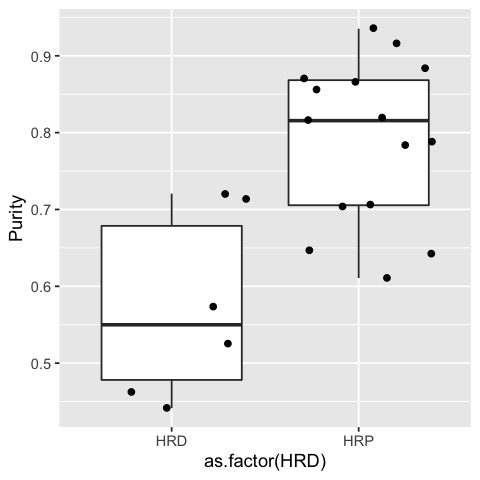

In [13]:
library(ggplot2)
options(repr.plot.width=4,repr.plot.height=4)
ggplot(df,aes(x=as.factor(HRD),y=Purity))+geom_boxplot()+geom_jitter()


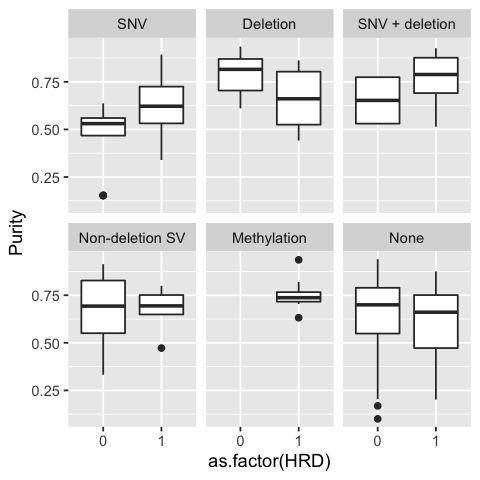

In [148]:
library(ggplot2)
df<-sampleInfo[hrd_df[,"Sample"],]
df2<-merge(df,hrd_df[,c("Sample","Col")],by="Sample")

df2$HRD<-ifelse(df2$HRDetect>0.7,1,0)

ggplot(df2,aes(x=as.factor(HRD),y=Purity))+geom_boxplot()+facet_wrap(Col~.)

In [149]:
table(hrd_df$MutCat)


             SNV_only     Germline SNV only      Somatic SNV only 
                   26                    15                    11 
    Any deletion only       Single deletion       Double deletion 
                   27                    21                     6 
Compound same or both         Compound same         Compound both 
                   15                     9                     6 
           SV non_del  Promoter methylation                  None 
                   20                     9                    89 

The number of double deletions is too small to adjust for covariates. However, if we adjust for cellularity in all deletions and single deletions then it is not informative to the model.

In [150]:
hrd_df$HRD<-ifelse(hrd_df$HRDetect>0.7,"HRD","HRP")

hrd_df2<-merge(hrd_df,sampleInfo[,c("Sample","Purity")],by="Sample")


singledels<-hrd_df2[hrd_df2$MutCat=="Any deletion only" | hrd_df2$MutCat=="None",]

singledels$HRD<-as.factor(singledels$HRD)
singledels$HRD <- relevel(singledels$HRD, ref = "HRP")
singledels$MutCat<-as.factor(singledels$MutCat)
singledels$MutCat <- relevel(singledels$MutCat, ref = "None")
summary(glm(as.factor(singledels$HRD)~as.factor(singledels$MutCat)+singledels$Purity,family="binomial"))


Call:
glm(formula = as.factor(singledels$HRD) ~ as.factor(singledels$MutCat) + 
    singledels$Purity, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1679  -0.8786  -0.7286   1.2702   1.7911  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                     0.1082     0.6703   0.161
as.factor(singledels$MutCat)Any deletion only   0.9078     0.4755   1.909
singledels$Purity                              -1.7001     1.0392  -1.636
                                              Pr(>|z|)  
(Intercept)                                     0.8717  
as.factor(singledels$MutCat)Any deletion only   0.0563 .
singledels$Purity                               0.1018  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 145.25  on 115  degrees of freedom
Residual deviance: 140.11  on 113  degrees

In [151]:
hrd_df$HRD<-ifelse(hrd_df$HRDetect>0.7,"HRD","HRP")

hrd_df2<-merge(hrd_df,sampleInfo[,c("Sample","Purity")],by="Sample")


singledels<-hrd_df2[hrd_df2$MutCat=="Any deletion only" | hrd_df2$MutCat=="None",]

singledels$HRD<-as.factor(singledels$HRD)
singledels$HRD <- relevel(singledels$HRD, ref = "HRP")
singledels$MutCat<-as.factor(singledels$MutCat)
singledels$MutCat <- relevel(singledels$MutCat, ref = "None")
summary(glm(as.factor(singledels$MutCat)~singledels$Purity,family="binomial"))


Call:
glm(formula = as.factor(singledels$MutCat) ~ singledels$Purity, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0021  -0.7845  -0.6550  -0.3653   2.0313  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)         -3.257      1.004  -3.243  0.00118 **
singledels$Purity    3.012      1.372   2.196  0.02812 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 125.88  on 115  degrees of freedom
Residual deviance: 120.16  on 114  degrees of freedom
AIC: 124.16

Number of Fisher Scoring iterations: 4


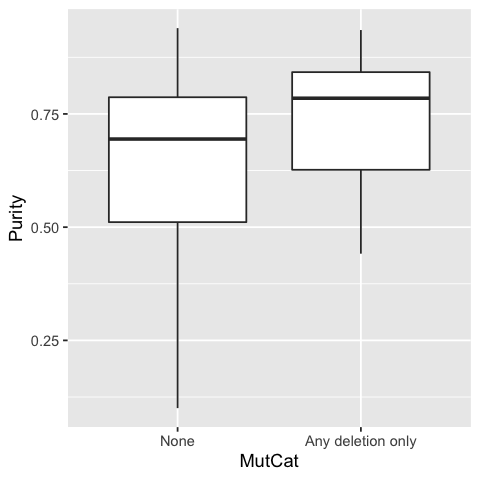

In [152]:
options(repr.plot.width=4,repr.plot.height=4)
ggplot(singledels,aes(x=MutCat,y=Purity))+geom_boxplot()

Samples with BRCA1/2 deletions have higher cellularity.


In [153]:
summary(glm(as.factor(sampleInfo$HRD)~sampleInfo$Purity,family="binomial"))


Call:
glm(formula = as.factor(sampleInfo$HRD) ~ sampleInfo$Purity, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2452   0.0851   0.0994   0.1106   0.1275  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)          6.735      4.691   1.436    0.151
sampleInfo$Purity   -2.050      6.376  -0.322    0.748

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12.641  on 204  degrees of freedom
Residual deviance: 12.526  on 203  degrees of freedom
AIC: 16.526

Number of Fisher Scoring iterations: 8


In [154]:
s<-hrd_df[hrd_df$MutCat=="Double deletion","Sample"]
sampleInfo[s,c("Sample","HRDetect","Purity")]

,Sample,HRDetect,Purity
,<chr>,<dbl>,<dbl>
AOCS_114,AOCS_114,0.9999054,0.800303
AOCS_148,AOCS_148,0.9993638,0.813065
DO31769,DO31769,0.9987108,0.829078
SHGSOC034,SHGSOC034,0.9999448,0.608479
SHGSOC067,SHGSOC067,0.8944988,0.523014
SHGSOC102,SHGSOC102,0.9990781,0.862935


### Mutational load

In [155]:
Dels<-hrd_df[hrd_df$MutCat=="Any deletion only",]
df<-sampleInfo[Dels[,"Sample"],]
df$HRD<-ifelse(df$HRDetect>0.7,"HRD","HRP")
df$whichBRCA<-ifelse(df$BRCA1status=="Deletion overlapping exon (LOF)","BRCA1","BRCA2")


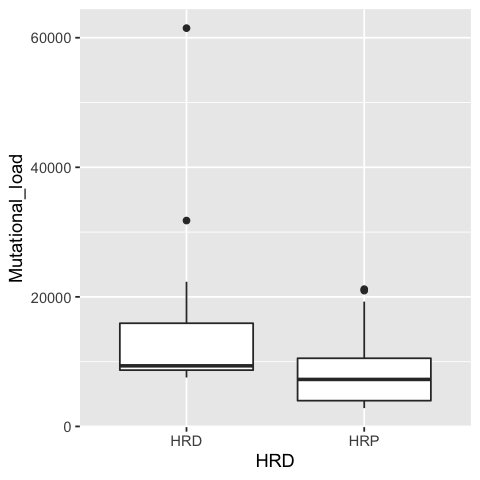

In [156]:
options(repr.plot.width=4,repr.plot.height=4)
ggplot(df,aes(x=HRD,y=Mutational_load))+geom_boxplot()

## Non-deletion SVs

In [179]:
Nondels<-hrd_df[hrd_df$MutCat=="SV non_del",]
df<-sampleInfo[Nondels[,"Sample"],]
df$HRD<-ifelse(df$HRDetect>0.7,"HRD","HRP")
df$whichBRCA<-ifelse(df$BRCA1status=="None","BRCA2",ifelse(df$BRCA2status=="None","BRCA1","both"))


In [180]:
table(df$HRD,df$BRCAstatus)
fisher.test(matrix(c(1,3,5,3),byrow=T,nrow=2))

table(df$HRD,df$whichBRCA)
fisher.test(matrix(c(3,3,6,5),byrow=T,nrow=2))

table(df$BRCAstatus,df$whichBRCA)

     
      Complex combination of SVs without LOF
  HRD                                      1
  HRP                                      3
     
      Duplication spanning gene (COPY_GAIN) Inversion spanning gene (INV_SPAN)
  HRD                                     1                                  6
  HRP                                     5                                  3
     
      SV without LOF
  HRD              1
  HRP              0


	Fisher's Exact Test for Count Data

data:  matrix(c(1, 3, 5, 3), byrow = T, nrow = 2)
p-value = 0.5455
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.00319446 4.50042353
sample estimates:
odds ratio 
  0.230358 


     
      both BRCA1 BRCA2
  HRD    3     3     3
  HRP    0     6     5


	Fisher's Exact Test for Count Data

data:  matrix(c(3, 3, 6, 5), byrow = T, nrow = 2)
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.07422606 9.44657665
sample estimates:
odds ratio 
 0.8423463 


                                        
                                         both BRCA1 BRCA2
  Complex combination of SVs without LOF    0     3     1
  Duplication spanning gene (COPY_GAIN)     0     0     6
  Inversion spanning gene (INV_SPAN)        3     6     0
  SV without LOF                            0     0     1

In general, looks like HRD samples are those with inversions at BRCA1 and HRP are those with duplications at BRCA2

In [181]:
for (i in vars_toconsider){
    print(i)
    print(wilcox.test(df[,i] ~ df$HRD))
}

[1] "Facets_WGD_score"


Warning message in wilcox.test.default(x = c(0.954, 0.801, 0.148, 0.524, 0.674, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  df[, i] by df$HRD
W = 51.5, p-value = 0.9092
alternative hypothesis: true location shift is not equal to 0

[1] "Purity"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 44, p-value = 0.7103
alternative hypothesis: true location shift is not equal to 0

[1] "AvPloidy"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 68, p-value = 0.1754
alternative hypothesis: true location shift is not equal to 0

[1] "Mutational_load"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 94, p-value = 0.0002262
alternative hypothesis: true location shift is not equal to 0

[1] "SV_load"

	Wilcoxon rank sum test

data:  df[, i] by df$HRD
W = 87, p-value = 0.003144
alternative hypothesis: true location shift is not equal to 0

[1] "CNV_load"


Warning message in wilcox.test.default(x = c(273L, 196L, 75L, 98L, 335L, 73L, 131L, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  df[, i] by df$HRD
W = 63, p-value = 0.3231
alternative hypothesis: true location shift is not equal to 0



## Compound mutations

In [184]:
compound<-hrd_df[hrd_df$MutCat=="Compound same or both",]
df<-sampleInfo[compound[,"Sample"],]
df$HRD<-ifelse(df$HRDetect>0.7,"HRD","HRP")
print(df)

             Sample Cohort   BRCAstatus                     BRCA1status
AOCS_034   AOCS_034     AO Germline SNV                    Germline SNV
AOCS_058   AOCS_058     AO Germline SNV                    Germline SNV
AOCS_063   AOCS_063     AO  Somatic SNV Deletion overlapping exon (LOF)
AOCS_145   AOCS_145     AO Germline SNV                    Germline SNV
AOCS_147   AOCS_147     AO  Somatic SNV Deletion overlapping exon (LOF)
AOCS_153   AOCS_153     AO Germline SNV                            None
DO28273     DO28273     DO  Somatic SNV                            None
DO31869     DO31869     DO  Somatic SNV Deletion overlapping exon (LOF)
DO32237     DO32237     DO Germline SNV Deletion overlapping exon (LOF)
DO32391     DO32391     DO  Somatic SNV                     Somatic SNV
DO32420     DO32420     DO Germline SNV                    Germline SNV
SHGSOC001 SHGSOC001     SH Germline SNV                    Germline SNV
SHGSOC009 SHGSOC009     SH Germline SNV                         

## Cohort specific mutational load

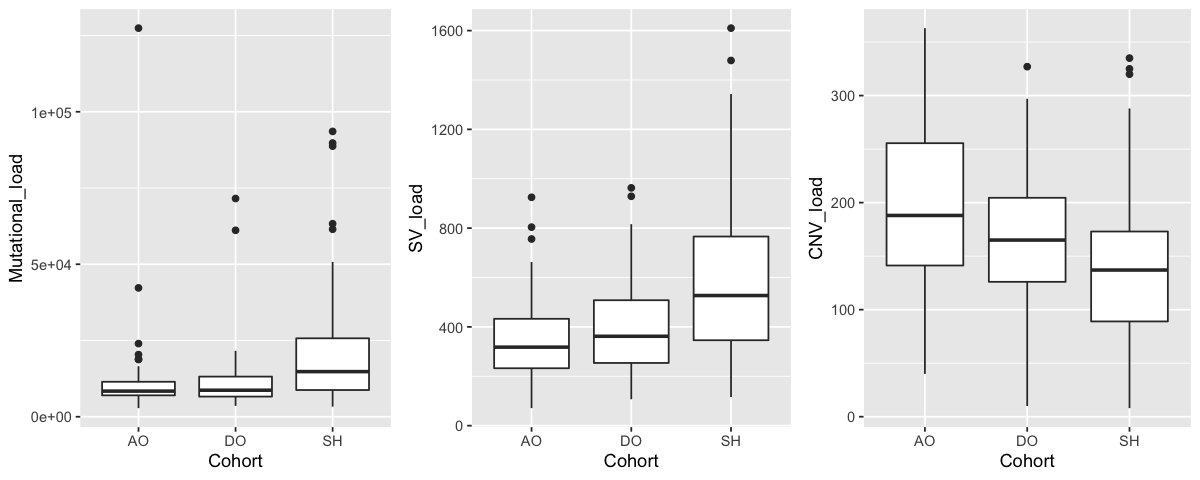

In [196]:
library(gridExtra)
options(repr.plot.width=10)
g1<-ggplot(sampleInfo,aes(x=Cohort,y=Mutational_load))+geom_boxplot()
g2<-ggplot(sampleInfo,aes(x=Cohort,y=SV_load))+geom_boxplot()
g3<-ggplot(sampleInfo,aes(x=Cohort,y=CNV_load))+geom_boxplot()
grid.arrange(g1,g2,g3,nrow=1)

In [192]:
sum(sampleInfo[sampleInfo$Cohort=="AO","Mutational_load"])/80
sum(sampleInfo[sampleInfo$Cohort=="DO","Mutational_load"])/44
sum(sampleInfo[sampleInfo$Cohort=="SH","Mutational_load"])/81

[1] 11318.14

[1] 12188.7

[1] 21554.78